In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

<AxesSubplot:>

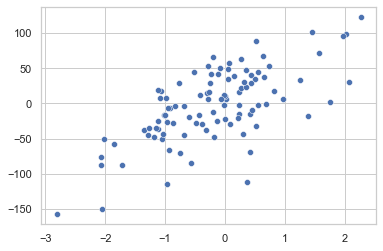

In [2]:
X, y = make_regression(n_features=1, bias=10, noise=40)
x = X.ravel()
sns.scatterplot(x=x, y=y)

Уравнение множественной линейной регрессии для нескольких параметров x имеет следующий вид:
$$Y=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p$$
Основная задача - поиск коэффициентов $\theta_k$

/Users/volkserg/programming/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


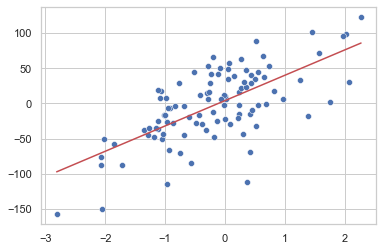

In [3]:
m = LinearRegression()
m.fit(X, y)

sns.scatterplot(X.ravel(), y)

minimax = np.array([X.min(), X.max()])
plt.plot(minimax, m.predict(minimax.reshape(-1, 1)),
                color='r', linestyle='solid')

plt.show()

In [4]:
#[theta_1], theta_0
m.coef_, m.intercept_

(array([36.01826479]), 3.925004203984572)

In [5]:
#остатки модели 
dy = y - m.predict(X)
dy

array([ 2.82865718e+01, -2.81604041e+01,  1.09144428e+00,  1.16539257e+01,
        2.13576539e+01,  2.97807706e+01, -5.80198898e+01, -4.87686438e+01,
        1.72640138e+01, -3.23691188e+01, -2.43385267e+01,  1.29286367e+01,
       -8.87460019e+01,  5.18292764e+01,  4.95390308e+01,  1.87420678e+01,
        5.99922840e+00, -3.43350851e+01,  2.06294624e+01, -6.06153421e+01,
       -9.47093934e+00, -1.63989836e+01, -4.74173798e+01,  6.63376318e+00,
       -1.73267819e+01,  1.20620305e+01,  5.99765052e+01,  2.16732803e+01,
        1.64845676e+01, -8.37242044e+01, -3.22115507e+00, -2.59976887e+01,
        3.91591359e+01,  2.26168914e+01,  9.19106478e+00,  5.55362865e-02,
        1.57350145e+01,  1.28461468e+01, -2.56499816e+01,  2.07256623e+01,
       -6.46116032e+01,  5.22755219e+01,  4.96324697e+00,  4.50253970e+01,
        2.32582908e+01, -6.82208779e+01,  3.14634543e+01, -4.53666180e+01,
       -1.28163522e+02, -1.43556510e+01,  3.74068626e+01,  6.63164532e+01,
       -1.98299106e+01, -

<AxesSubplot:ylabel='Count'>

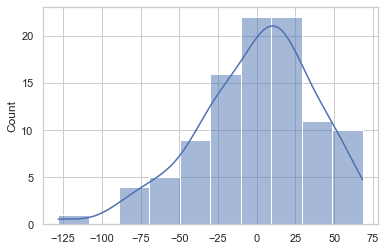

In [6]:
#график распределения остатков
sns.histplot(dy, kde=True)

In [7]:
stats.shapiro(dy)

ShapiroResult(statistic=0.9710947275161743, pvalue=0.026826059445738792)

In [8]:
dy.mean()

1.8474111129762605e-15

Критерий Стьюдента для одной выборки позволяет проверить гипотезу о том, что среднее значение изучаемого признака $M_X$ отличается от некоторого известного значения $A$ <br>
$H_0: \overline{M_X}=A$ <br> $H_A: \overline{M_X}<>A$

In [9]:
#критерий Стьюдента для одной выборки
stats.ttest_1samp(dy, 0)

Ttest_1sampResult(statistic=4.882895530822952e-16, pvalue=0.9999999999999996)

<AxesSubplot:>

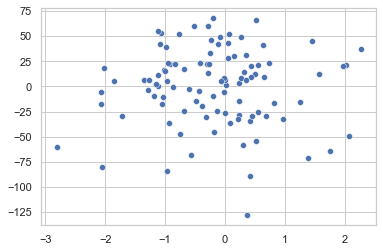

In [10]:
#график совместного распределение предиктора и остатков
sns.scatterplot(x=x, y=dy)

In [11]:
X, y = make_regression(n_features=5, bias=10, noise=40)

Ручная реализация линейной регрессии:
$$
\hat{\theta}_n = W_n^{-1} X_n^T Y_n
$$
где $\hat{\theta}_n$ - итоговый вектор коэффициентов <br>
$W_n=X_n^T X_n$ <br><br><br><br>

Вычисление $\theta_0$ (intercept):
$$\theta_0 = \overline{Y}_n - \theta_1\overline{X}_1 - \theta_2\overline{X}_2 - ... - \theta_p\overline{X}_p$$

In [12]:
# Ручная реализация
#xT = x.T
#x^(-1) = np.linalg.inv(x)
#Произведение матриц X и Y = X.dot(Y) или np.dot(X,Y)


In [13]:
#модель sklearn

m = LinearRegression()
m.fit(X, y)

print(m.coef_)
print(m.intercept_)

[15.42569989 43.06283222 64.26105757  5.14240022 26.27793257]
7.134316147946833


Коэффициент детерминации:
$$
R^2 =
\dfrac{\sum_{k=1}^{n}(\hat{Y}_k - \overline{Y}_n)^2}
{\sum_{k=1}^{n}(Y_k - \overline{Y}_n)^2}
$$

где $\overline{Y_n}$ - выборочное среднее, <br>
$\hat{Y}_k$ - оценка значения переменной Y в k-ом опыте 

<br><br><b>или</b> 

$$
R^2 = 1 - 
\dfrac{\sum_{k=1}^{n}(\hat{\varepsilon}_k)^2}
{\sum_{k=1}^{n}(Y_k - \overline{Y}_n)^2}
$$

где $\hat{\varepsilon}_k$ - остаток k-го наблюдения
<br><br><br>

Несмещенный коэффициент детерминации:
$$
\tilde{R}^2= 1 - 
\dfrac{n-1}{n-p}
\dfrac{\sum_{k=1}^{n}(\hat{\varepsilon}_k)^2}
{\sum_{k=1}^{n}(Y_k - \overline{Y}_n)^2}
$$

$n$ - количество наблюдений <br>
$p$ - количество предикторов

In [14]:
#Коэффициент детерминации
m.score(X, y)

0.8074653558286765

### Пример

In [15]:
from sklearn.datasets import load_boston

In [16]:
boston_dataset = load_boston()
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [17]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
df["PRICE"]=boston_dataset.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
prices = df['PRICE']
features = df.drop('PRICE', axis=1)

In [22]:
#sklearn model results
sk_model = LinearRegression()
sk_model.fit(features, prices)

print(sk_model.coef_)
print(sk_model.intercept_)
print(sk_model.score(features, prices))

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838508978
0.7406426641094095


In [23]:
#our model results